Simulated and Experimental Comparison for FVA

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import seaborn
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import zscore, spearmanr
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

In [3]:
#import consumption production frame from iterative pFBA analysis
fortyCP = pd.read_pickle("cp40.pkl")

In [4]:
#import values from experimenal testing
biolog = pd.read_csv('plata_biolog_raw.csv', index_col = 0)

Rewriting some of the nutrient names in experimental data to match nomenclature of simulated nutrients

In [5]:
biolog.columns = ['Dextrin', 'Maltose', 'TRHL', 'CELB', 'Gentiobiose',
       'Sucrose', 'Stachyose', 'D-Raffinose', 'LACT', 'Melibiose',
       'b-Methyl-D-Glucoside', 'Salicin', 'N-Acetyl-D-glucosamine',
       'N-Acetyl-D-mannosamine', 'N-Acetyl-DGalactosamine',
       'N-Acetyl-Neuraminic Acid', 'D-Glucose', 'D-Mannose', 'D-Fructose',
       'Galactose', 'D-Fucose', 'L-Fucose', 'L-Rhamnose', 'Inosine',
       'Sorbitol', 'D-Mannitol', 'D-Arabitol', 'L-Inositol', 'Glycerol',
       'D-glucose-6-phosphate', 'Fructose-6-Phosphate', 'D-Aspartic Acid',
       'D-Serine', 'Gelatin', 'L-Alanine', 'L-Arginine', 'L-Aspartate',
       'L-Glutamate', 'L-Histidine', 'L-PyroglutamicAcid', 'L-Serine',
       'Pectin', 'D-Galacturonate', 'L-GalactonicAcid-g-Lactone',
       'GLCN', 'Glucuronate', 'Mucic Acid', 'Quinic Acid',
       'D-Saccharic Acid', 'P-HydroxyPhenyl AceticAcid', 'L-Lactate',
       'Citrate', '2-Oxoglutarate', 'D-Malic Acid', 'L-Malate',
       'GABA', 'a-HydroxyButyric Acid', '2-Oxobutyrate',
       'Acetoacetic Acid', 'Propionic Acid', 'Acetic Acid', 'Formate']
biolog_nutrients = biolog.columns
fortyCP_nutrients = fortyCP.columns

In [6]:
intersection = biolog_nutrients.intersection(fortyCP_nutrients)
print(intersection)
print("number of nutrients that the two datasets have in common:")
print(intersection.shape[0])

Index(['Maltose', 'TRHL', 'Stachyose', 'D-Fructose', 'Galactose', 'L-Arginine',
       'L-Glutamate', 'L-Histidine', '2-Oxobutyrate'],
      dtype='object')
number of nutrients that the two datasets have in common:
9


Overall Comparison

In [7]:
fortyCP.sort_index(inplace = True)
biolog.sort_index(inplace = True)

0.9999999999999999


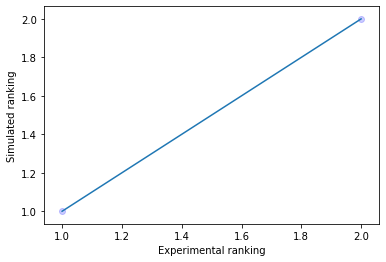

In [9]:
i = 0
avg = 0
count = 0
arr_b = []
arr_f = []
while i < biolog.shape[0]:
    intersection = (biolog.iloc[i][biolog.iloc[i]!=0].index.intersection(fortyCP.iloc[i][fortyCP.iloc[i]<0].index))
    biolog_i = biolog.iloc[i][intersection]
    fortyCP_i = fortyCP.iloc[i][intersection]
    rank_b = biolog_i.rank()
    rank_f = fortyCP_i.rank(ascending = False)
    if intersection.shape[0]>1 and not np.isnan(spearmanr(rank_b, rank_f)[0]):
        avg+=(spearmanr(rank_b, rank_f)[0])
        plt.scatter(rank_b, rank_f, alpha=0.2, c = 'b')
        arr_b = np.append(arr_b,rank_b.values)
        arr_f = np.append(arr_f,rank_f.values)
        count+=1
    i+=1
avg = avg/count
print(avg)
x = np.linspace(1, 2, 1000)
plt.plot(x,x)
plt.xlabel('Experimental ranking')
plt.ylabel('Simulated ranking');

In [10]:
Pcorr, Ppval = pearsonr(arr_b, arr_f)
print('Pearson correlation: %.3f' % Pcorr)
print('Pearson pval: %f' % Ppval)

Pearson correlation: 1.000
Pearson pval: 1.000000


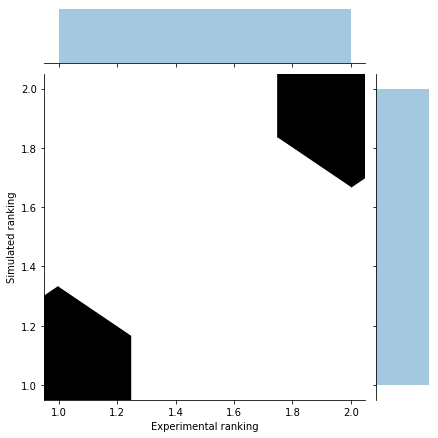

In [11]:
hexplot = seaborn.jointplot(arr_b, arr_f, kind = 'hex')
hexplot.set_axis_labels('Experimental ranking', 'Simulated ranking');

All code below this point is extra/outdated.

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#regressor.fit(np.concatenate(np.array(arr_b)).reshape(-1,1), np.concatenate(np.array(arr_f)).reshape(-1, 1))
#print('slope:', regressor.coef_)
#np.array(arr_b)

In [ ]:
#plotting spearman correlation
from scipy.stats import spearmanr
i = 0
arr = [];
placeholder = pd.DataFrame(np.zeros((2,55)))
while i < fortyCP.shape[0]:
    if not np.isnan(spearmanr(rank_b.iloc[i],rank_f.iloc[i])[0]):
        arr.append(spearmanr(rank_b.iloc[i],rank_f.iloc[i])[0])
    i += 1
p = seaborn.stripplot(data=arr)

In [ ]:
biolog.iloc[2][biolog.iloc[2]!=0].index.intersection(fortyCP.iloc[2][fortyCP.iloc[2]!=0].index)

In [ ]:
i = 0
avg = 0
count = 0
while i < biolog.shape[0]:
    intersection = (biolog.iloc[i][biolog.iloc[i]!=0].index.intersection(fortyCP.iloc[i][fortyCP.iloc[i]!=0].index))
    biolog_i = biolog.iloc[i][intersection]
    fortyCP_i = fortyCP.iloc[i][intersection]
    rank_b = biolog_i.rank()
    rank_f = fortyCP_i.rank()
    if intersection.shape[0]>1 and not np.isnan(spearmanr(rank_b, rank_f)[0]):
        avg+=(spearmanr(rank_b, rank_f)[0])
        count+=1
    i+=1
avg = avg/count
print(avg)

In [ ]:
# plot of zscore(rank_biolog - rank_fba)
output = np.subtract(rank_b, rank_f)
output_z = output.apply(zscore)
p = seaborn.stripplot(data=output_z)

In [ ]:
p = seaborn.stripplot(data=output_z.transpose())
p.set_xticklabels(output_z.index, rotation = 70, ha = 'right', size=8);

In [ ]:
output = np.subtract(rank_b, rank_f)
fig, ax = plt.subplots()
im = ax.imshow(output,cmap='PiYG_r')
ax.set_xticks(np.arange(len(intersection)))
ax.set_xticklabels(intersection, rotation=90);
ax.set_yticks(np.arange(len(biolog_i.index)))
ax.set_yticklabels(biolog_i.index);
cb = plt.colorbar(im)

fig.set_size_inches(15, 15)
fig.tight_layout()

In [ ]:
print(output_z)
#np.histogram(output)
plt.hist(output_z, bins = [-3 ,  -2,  -1,0,1, 2,3]); 
plt.xlabel('Biolog - pFBA')
plt.ylabel('Frequency')
plt.title('Histogram of Biolog/pFBA comparison')

In [ ]:
#np.histogram(output)
plt.hist(output, bins = [-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]); 
plt.xlabel('Biolog - pFBA')
plt.ylabel('Frequency')
plt.title('Histogram of Biolog/pFBA comparison')